IMPORTING THE REQUIRED LIBRARIES

VISUALISATION OF DATA AND DATA ANALYSIS

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



CLASSIFIERS

In [ ]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

DATA PROCESSING FUNCTION

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

LOAD THE GIVEN DATASET(H1N1 VACCINE PREDICTION)

In [ ]:
url =('https://raw.githubusercontent.com/Premalatha-success/Datasets/main/h1n1_vaccine_prediction.csv')
df = pd.read_csv(url)

In [ ]:
df.sample(5)

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
13754,13754,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,4.0,2.0,2.0,4.0,2.0,2.0,55 - 64 Years,College Graduate,White,Male,"> $75,000",Married,Own,Employed,"MSA, Principle City",1.0,0.0,0
22877,22877,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,4.0,2.0,2.0,4.0,2.0,2.0,18 - 34 Years,Some College,White,Male,"<= $75,000, Above Poverty",Married,Rent,Employed,"MSA, Not Principle City",1.0,0.0,1
22171,22171,2.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,4.0,1.0,1.0,4.0,4.0,1.0,55 - 64 Years,College Graduate,White,Male,"> $75,000",Married,Own,Unemployed,"MSA, Not Principle City",2.0,1.0,0
11409,11409,2.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,4.0,2.0,2.0,4.0,2.0,1.0,65+ Years,12 Years,White,Female,NaN,Married,Own,Not in Labor Force,"MSA, Not Principle City",1.0,0.0,0
22138,22138,2.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,2.0,4.0,4.0,4.0,4.0,4.0,45 - 54 Years,12 Years,Hispanic,Male,"<= $75,000, Above Poverty",Married,NaN,Employed,Non-MSA,1.0,0.0,0


In [ ]:
df.shape

(26707, 34)

In [ ]:
df.dtypes

unique_id                      int64
h1n1_worry                   float64
h1n1_awareness               float64
antiviral_medication         float64
contact_avoidance            float64
bought_face_mask             float64
wash_hands_frequently        float64
avoid_large_gatherings       float64
reduced_outside_home_cont    float64
avoid_touch_face             float64
dr_recc_h1n1_vacc            float64
dr_recc_seasonal_vacc        float64
chronic_medic_condition      float64
cont_child_undr_6_mnths      float64
is_health_worker             float64
has_health_insur             float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
sick_from_h1n1_vacc          float64
is_seas_vacc_effective       float64
is_seas_risky                float64
sick_from_seas_vacc          float64
age_bracket                   object
qualification                 object
race                          object
sex                           object
income_level                  object
m

In [ ]:
df.columns

Index(['unique_id', 'h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'qualification',
       'race', 'sex', 'income_level', 'marital_status', 'housing_status',
       'employment', 'census_msa', 'no_of_adults', 'no_of_children',
       'h1n1_vaccine'],
      dtype='object')

In [ ]:
df['race'].value_counts()

White                21222
Black                 2118
Hispanic              1755
Other or Multiple     1612
Name: race, dtype: int64

In [ ]:
print(df['marital_status'].value_counts())
print(df['housing_status'].value_counts())
print(df['employment'].value_counts())
print(df['census_msa'].value_counts())
print(df['no_of_adults'].value_counts())
print(df['no_of_children'].value_counts())
print(df['h1n1_vaccine'].value_counts())

Married        13555
Not Married    11744
Name: marital_status, dtype: int64
Own     18736
Rent     5929
Name: housing_status, dtype: int64
Employed              13560
Not in Labor Force    10231
Unemployed             1453
Name: employment, dtype: int64
MSA, Not Principle  City    11645
MSA, Principle City          7864
Non-MSA                      7198
Name: census_msa, dtype: int64
1.0    14474
0.0     8056
2.0     2803
3.0     1125
Name: no_of_adults, dtype: int64
0.0    18672
1.0     3175
2.0     2864
3.0     1747
Name: no_of_children, dtype: int64
0    21033
1     5674
Name: h1n1_vaccine, dtype: int64


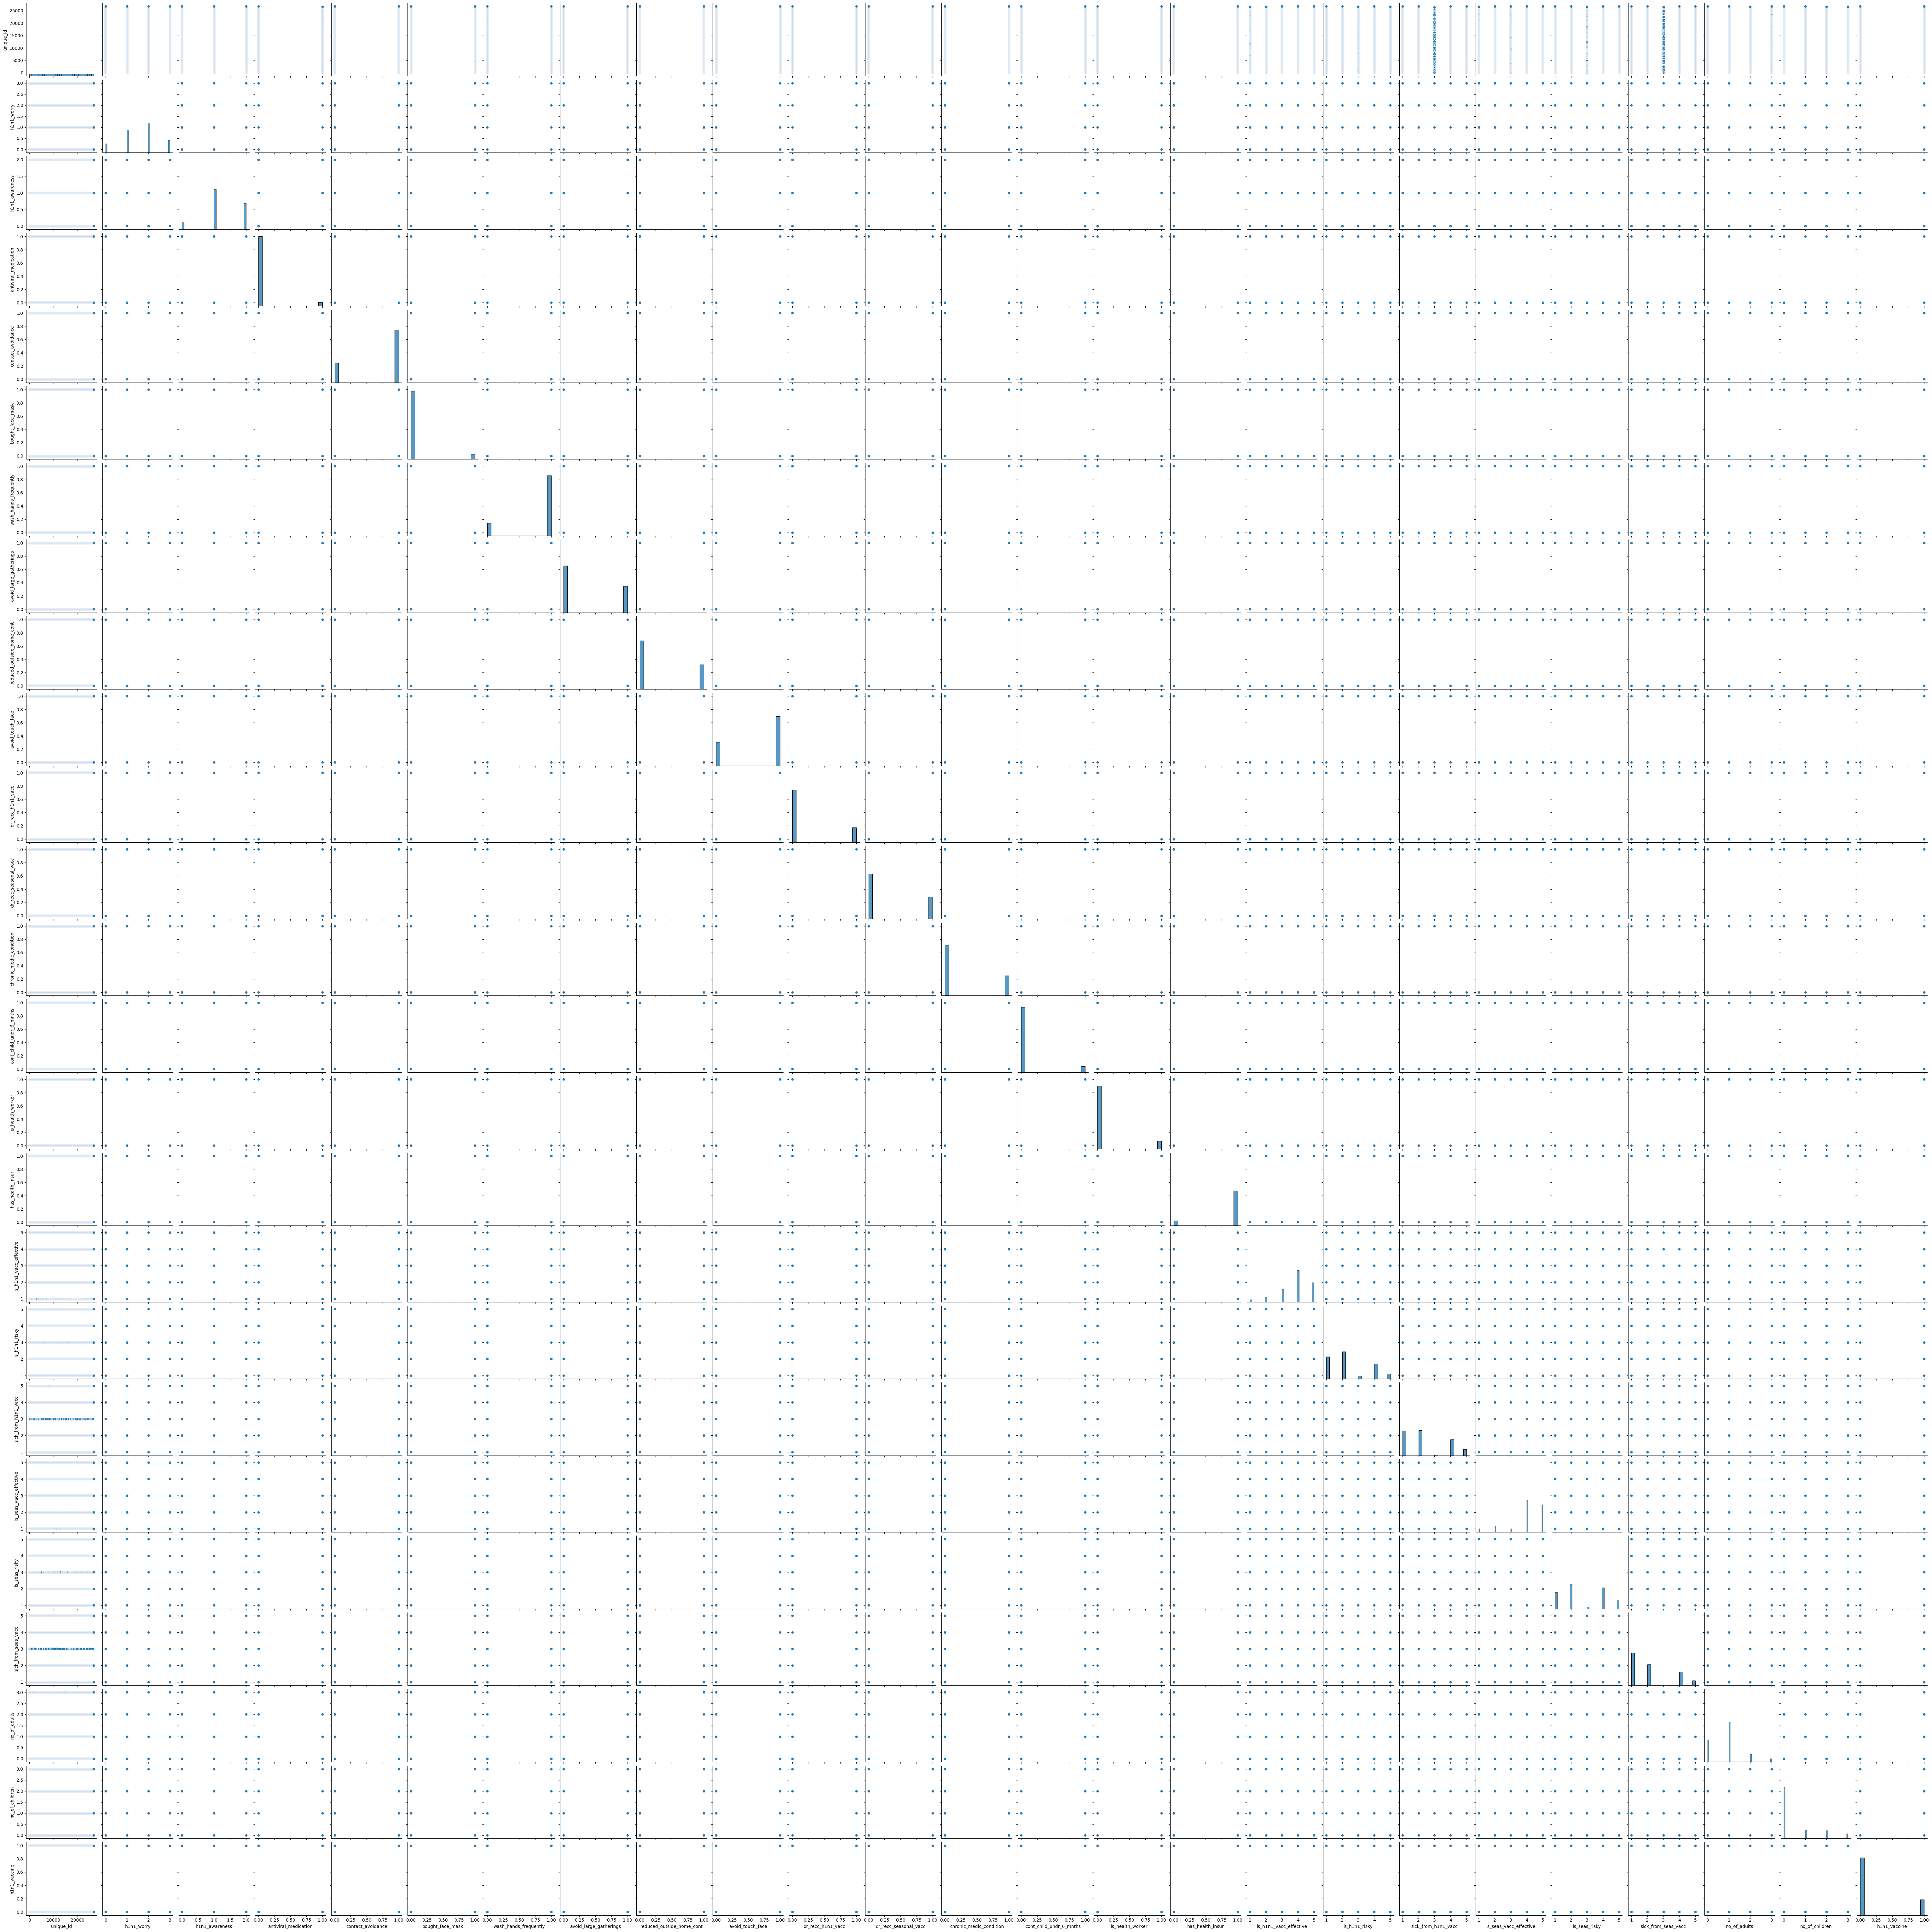

In [ ]:
sns.pairplot(df)

In [ ]:
corr= df.corr()
corr

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,no_of_adults,no_of_children,h1n1_vaccine
unique_id,1.000000,0.017839,0.003425,-0.008475,0.009638,-0.006644,0.011105,0.004539,0.009011,0.007575,-0.002072,0.001500,0.005797,-0.004839,-0.003149,-0.012603,0.005912,0.000958,-0.002270,0.005935,-0.005291,0.009563,0.000187,-0.003726,-0.003280
h1n1_worry,0.017839,1.000000,0.062522,0.090301,0.233713,0.156032,0.293565,0.255031,0.246424,0.248016,0.150206,0.135567,0.095162,0.049574,0.033562,-0.003655,0.239604,0.377033,0.360070,0.235136,0.333990,0.225731,-0.015658,0.050525,0.121929
h1n1_awareness,0.003425,0.062522,1.000000,-0.010836,0.088839,0.030050,0.089785,-0.048898,-0.068219,0.086162,0.093829,0.071920,-0.022602,0.021598,0.170252,0.119408,0.121009,0.073086,-0.019501,0.086103,0.076825,-0.062483,0.024874,0.050583,0.117951
antiviral_medication,-0.008475,0.090301,-0.010836,1.000000,0.049247,0.146261,0.064119,0.106287,0.127679,0.070868,0.051235,0.030909,0.008465,0.028788,0.009465,-0.063988,0.030211,0.105163,0.079091,0.015003,0.085315,0.084305,0.044900,0.084822,0.040608
contact_avoidance,0.009638,0.233713,0.088839,0.049247,1.000000,0.064946,0.338130,0.227675,0.220348,0.335335,0.068145,0.074088,0.039435,-0.000414,0.001180,0.032662,0.112300,0.117851,0.131405,0.119554,0.129504,0.082942,0.019122,0.040328,0.047690
bought_face_mask,-0.006644,0.156032,0.030050,0.146261,0.064946,1.000000,0.083363,0.180907,0.163382,0.104335,0.084282,0.069481,0.068113,0.039726,0.069992,-0.040257,0.037651,0.131165,0.107129,0.041556,0.110161,0.090009,0.013991,0.005826,0.070498
wash_hands_frequently,0.011105,0.293565,0.089785,0.064119,0.338130,0.083363,1.000000,0.195364,0.192619,0.365064,0.088729,0.102044,0.030260,0.036188,0.053761,0.031919,0.136987,0.168711,0.150024,0.138517,0.172464,0.088029,0.009669,0.047764,0.074712
avoid_large_gatherings,0.004539,0.255031,-0.048898,0.106287,0.227675,0.180907,0.195364,1.000000,0.584085,0.253683,0.082242,0.093557,0.104721,0.021168,-0.032319,-0.059000,0.052299,0.126463,0.185924,0.078491,0.132865,0.135446,-0.031938,-0.009449,0.017822
reduced_outside_home_cont,0.009011,0.246424,-0.068219,0.127679,0.220348,0.163382,0.192619,0.584085,1.000000,0.267719,0.070346,0.085622,0.098858,0.018195,-0.034619,-0.061381,0.050748,0.125549,0.174834,0.067469,0.120237,0.138133,-0.027527,-0.009558,0.021768
avoid_touch_face,0.007575,0.248016,0.086162,0.070868,0.335335,0.104335,0.365064,0.253683,0.267719,1.000000,0.088221,0.100808,0.028876,0.026640,0.067648,0.011024,0.104126,0.146080,0.131772,0.105798,0.143735,0.090097,-0.000553,0.023606,0.071648


<Axes: >

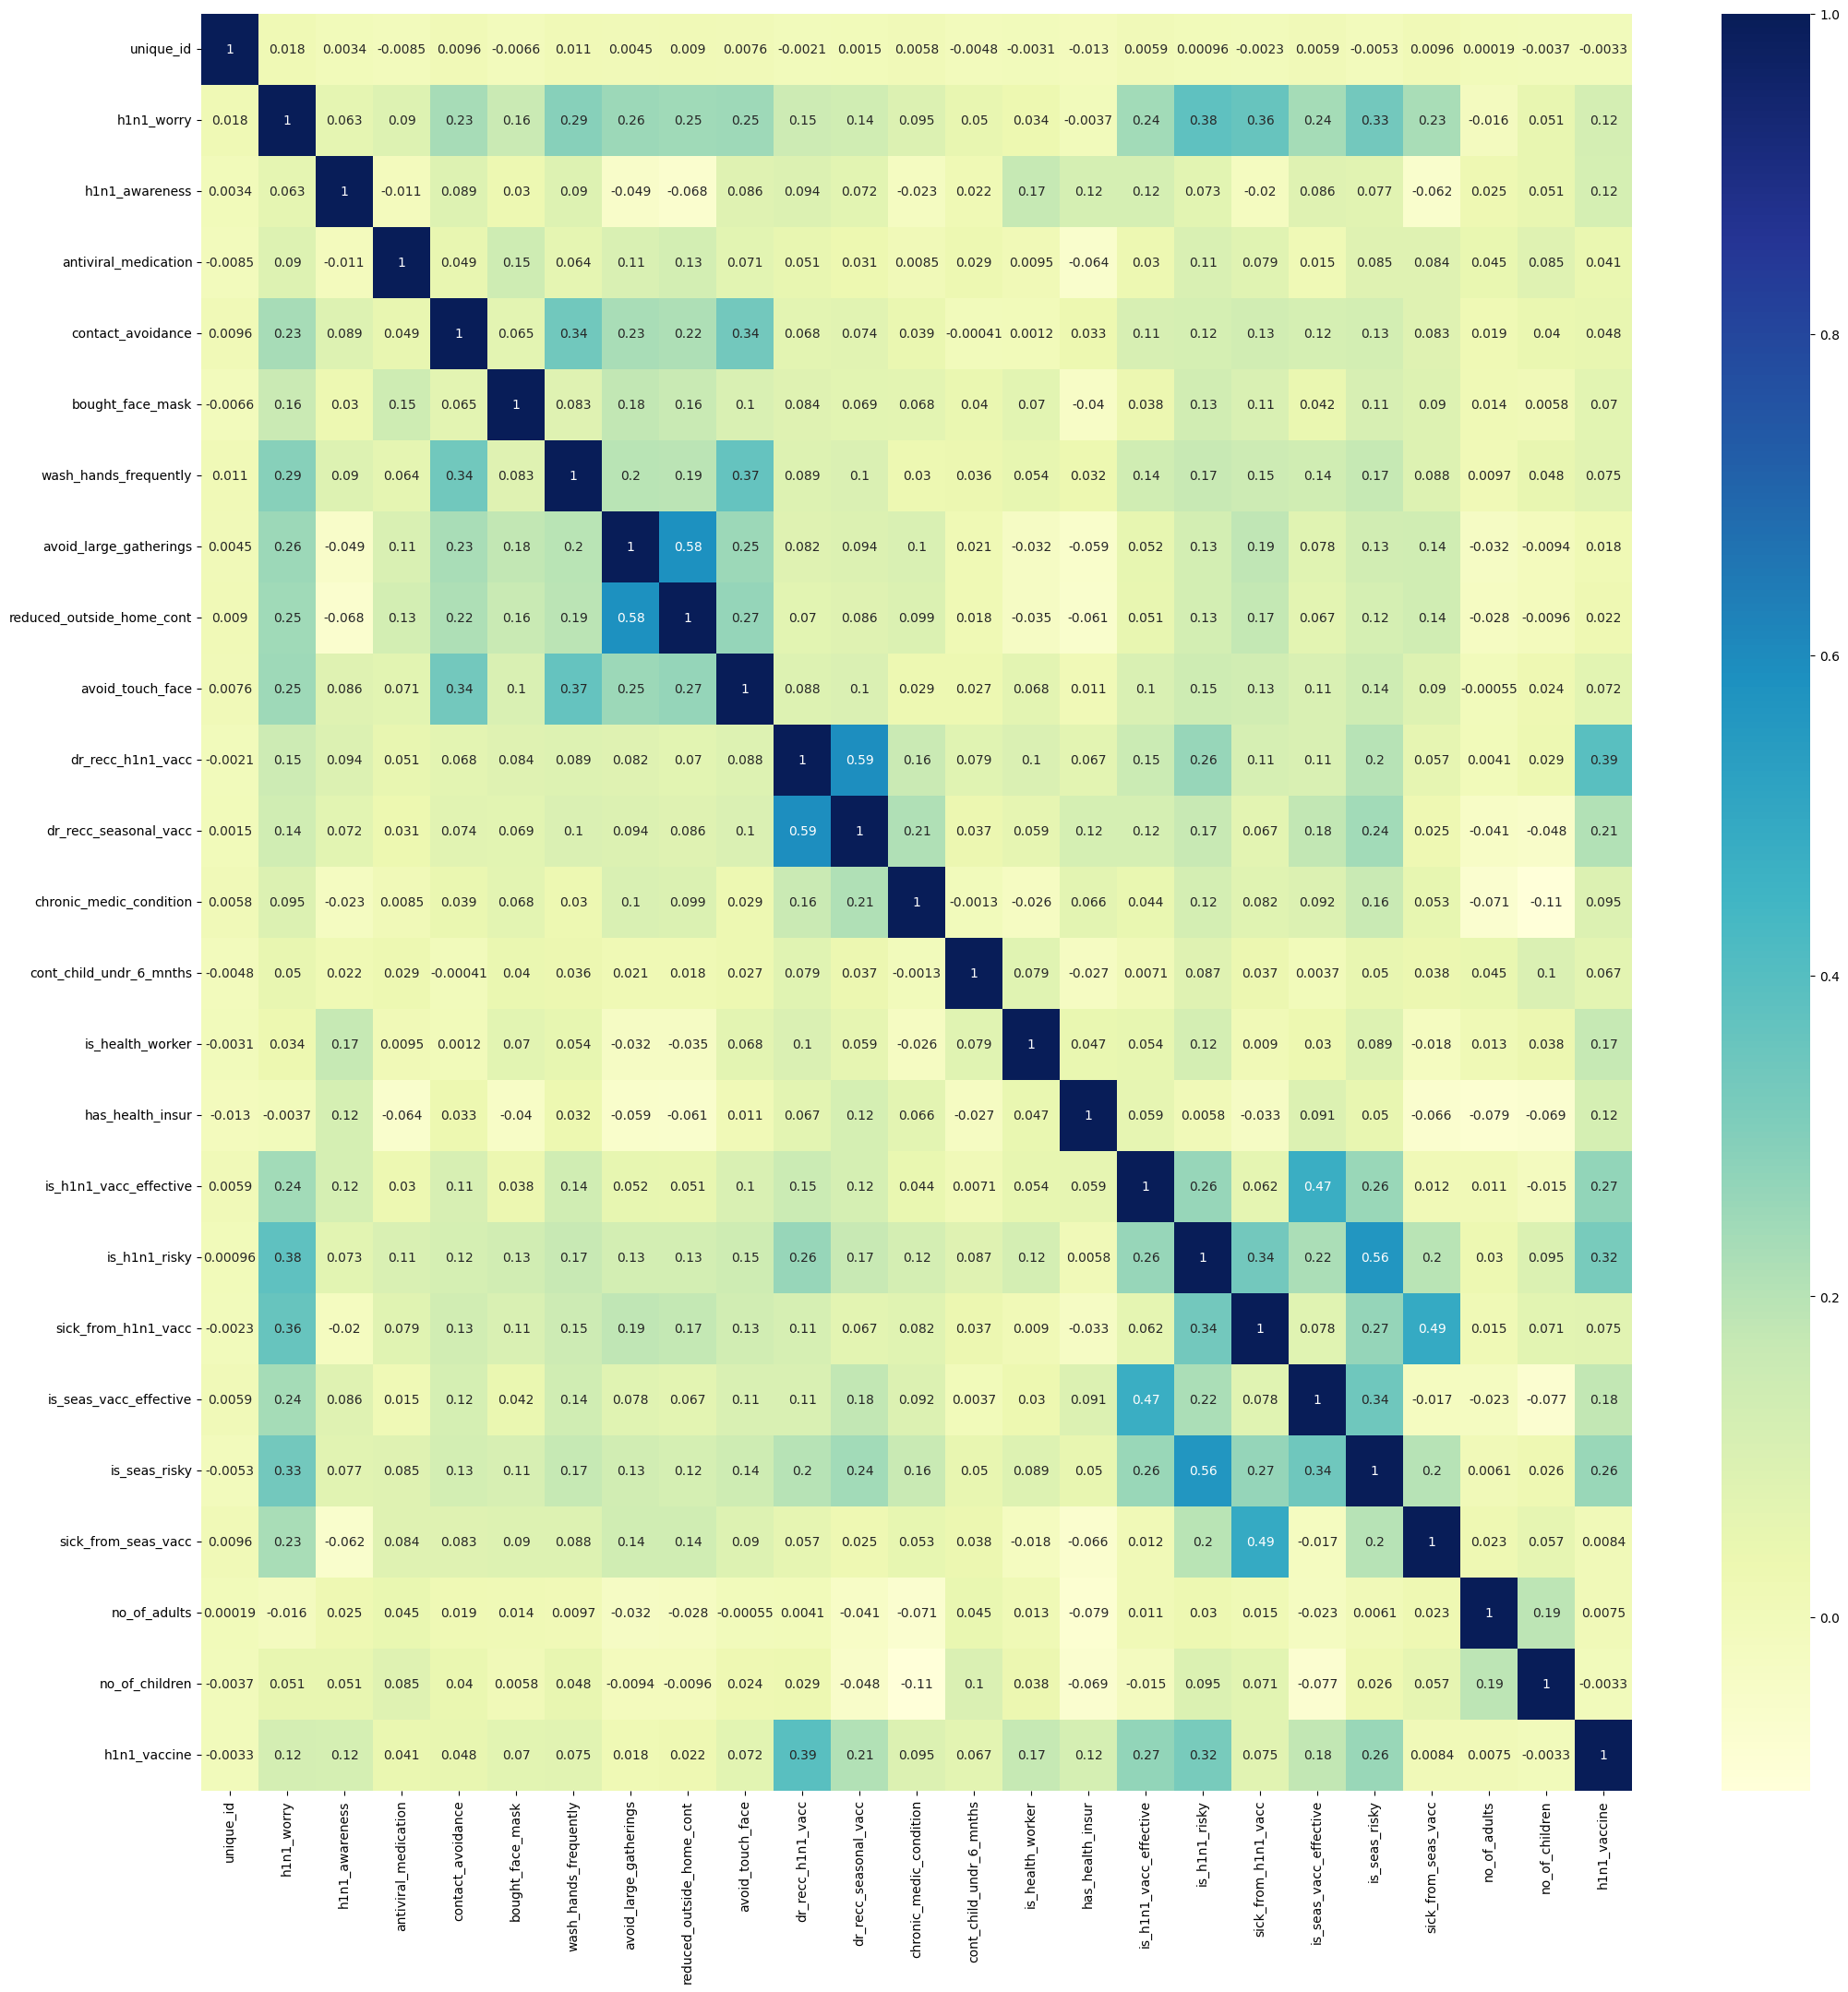

In [ ]:
plt.figure(figsize=(25,25))
sns.heatmap(corr, annot=True, cmap = 'YlGnBu')

In [ ]:
df.describe()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,no_of_adults,no_of_children,h1n1_vaccine
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,24547.000000,24547.000000,25736.000000,25887.000000,25903.000000,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000,26707.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,0.220312,0.329735,0.283261,0.082590,0.111918,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583,0.212454
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,0.414466,0.470126,0.450591,0.275266,0.315271,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173,0.409052
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000,0.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000


In [ ]:
df.describe(include='all')

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,24547.000000,24547.000000,25736.000000,25887.000000,25903.000000,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26707,25300,26707,26707,22284,25299,24665,25244,26707,26458.000000,26458.000000,26707.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,4,4,2,3,2,2,3,3,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65+ Years,College Graduate,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6843,10097,21222,15858,12777,13555,18736,13560,11645,NaN,NaN,NaN
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,0.220312,0.329735,0.283261,0.082590,0.111918,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.886499,0.534583,0.212454
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,0.414466,0.470126,0.450591,0.275266,0.315271,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.753422,0.928173,0.409052
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,0.000000


In [ ]:
df.sample(10).T

,16504,10978,10618,13777,24553,25716,23622,10987,24183,2584
unique_id,16504,10978,10618,13777,24553,25716,23622,10987,24183,2584
h1n1_worry,1.0,3.0,3.0,2.0,2.0,1.0,0.0,3.0,0.0,3.0
h1n1_awareness,1.0,1.0,1.0,2.0,1.0,2.0,0.0,1.0,2.0,0.0
antiviral_medication,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
contact_avoidance,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
bought_face_mask,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
wash_hands_frequently,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
avoid_large_gatherings,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
reduced_outside_home_cont,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0
avoid_touch_face,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0


In [ ]:
df.isnull().sum()

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

<Axes: >

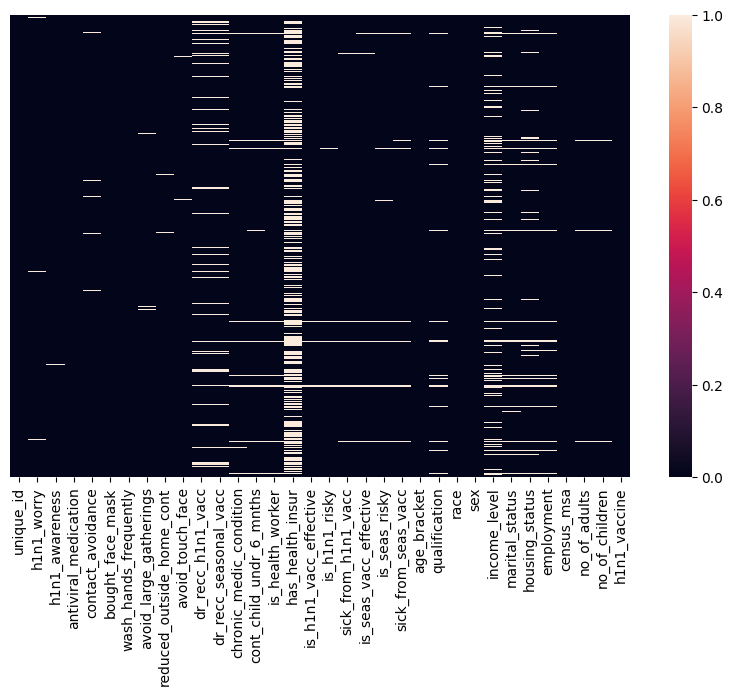

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(),yticklabels=False)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

In [ ]:
df.shape

(26707, 34)

In [ ]:
df['age_bracket'].value_counts()

65+ Years        6843
55 - 64 Years    5563
45 - 54 Years    5238
18 - 34 Years    5215
35 - 44 Years    3848
Name: age_bracket, dtype: int64

<Axes: xlabel='sex', ylabel='count'>

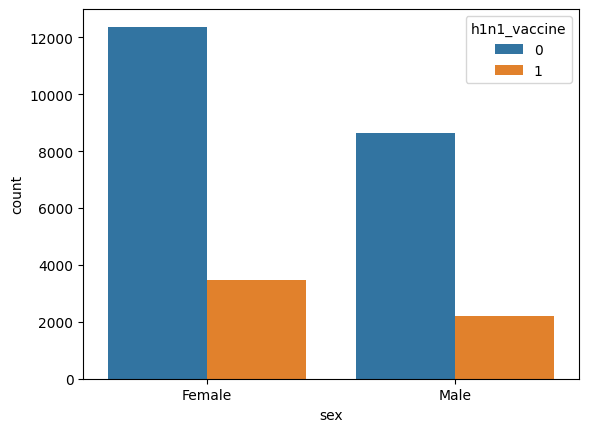

In [ ]:
sns.countplot(x = 'sex' , hue = 'h1n1_vaccine' , data = df)

Axes(0.125,0.11;0.775x0.77)


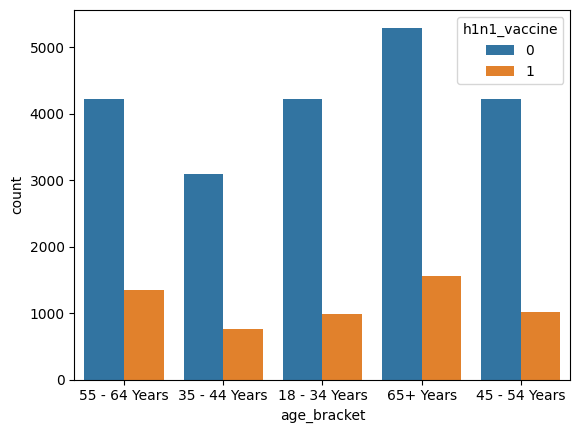

In [ ]:
print(sns.countplot(x = 'age_bracket' , hue = 'h1n1_vaccine' , data = df))

Axes(0.125,0.11;0.775x0.77)


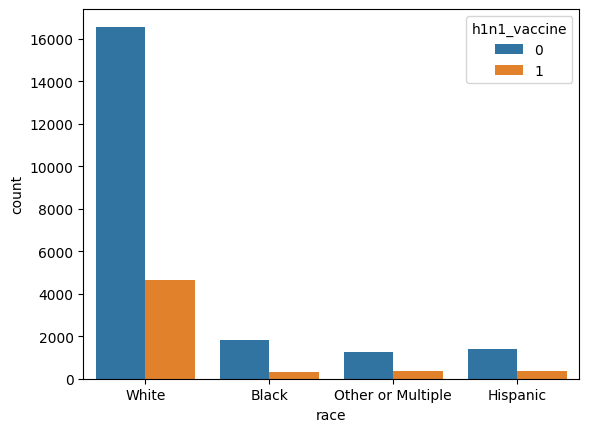

In [ ]:
print(sns.countplot(x = 'race', hue = 'h1n1_vaccine', data = df))

Axes(0.125,0.11;0.775x0.77)


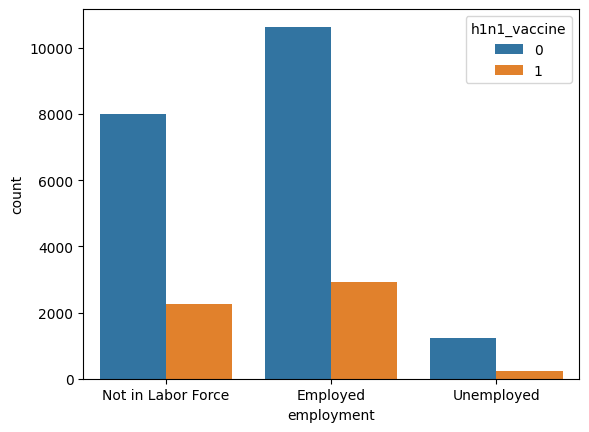

In [ ]:
print(sns.countplot(x = 'employment' , hue = 'h1n1_vaccine' , data = df))

In [ ]:
df=df.drop('unique_id', axis=1)

FILLING ALL VALUES WITH THE MODE OF RESPECTIVE VARIABLE

In [ ]:
df['qualification'].fillna(df['qualification'].mode()[0],inplace=True)
df['income_level'].fillna(df['income_level'].mode()[0],inplace=True)
df['marital_status'].fillna(df['marital_status'].mode()[0],inplace=True)
df['housing_status'].fillna(df['housing_status'].mode()[0],inplace=True)
df['employment'].fillna(df['employment'].mode()[0],inplace=True)
df['no_of_adults'].fillna(df['no_of_adults'].mode()[0],inplace=True)
df['no_of_children'].fillna(df['no_of_children'].mode()[0],inplace=True)
df['h1n1_worry'].fillna(df['h1n1_worry'].median(),inplace=True)
df['h1n1_awareness'].fillna(df['h1n1_awareness'].median(),inplace=True)
df['antiviral_medication'].fillna(df['antiviral_medication'].median(),inplace=True)
df['contact_avoidance'].fillna(df['contact_avoidance'].median(),inplace=True)
df['bought_face_mask'].fillna(df['bought_face_mask'].median(),inplace=True)
df['wash_hands_frequently'].fillna(df['wash_hands_frequently'].median(),inplace=True)
df['avoid_large_gatherings'].fillna(df['avoid_large_gatherings'].median(),inplace=True)
df['reduced_outside_home_cont'].fillna(df['reduced_outside_home_cont'].median(),inplace=True)
df['avoid_touch_face'].fillna(df['avoid_touch_face'].median(),inplace=True)
df['dr_recc_h1n1_vacc'].fillna(df['dr_recc_h1n1_vacc'].median(),inplace=True)
df['dr_recc_seasonal_vacc'].fillna(df['dr_recc_seasonal_vacc'].median(),inplace=True)
df['chronic_medic_condition'].fillna(df['chronic_medic_condition'].median(),inplace=True)
df['cont_child_undr_6_mnths'].fillna(df['cont_child_undr_6_mnths'].median(),inplace=True)
df['has_health_insur'].fillna(df['has_health_insur'].median(),inplace=True)
df['is_h1n1_vacc_effective'].fillna(df['is_h1n1_vacc_effective'].median(),inplace=True)
df['is_h1n1_risky'].fillna(df['is_h1n1_risky'].median(),inplace=True)
df['sick_from_h1n1_vacc'].fillna(df['sick_from_h1n1_vacc'].median(),inplace=True)
df['is_seas_vacc_effective'].fillna(df['is_seas_vacc_effective'].median(),inplace=True)
df['is_seas_risky'].fillna(df['is_seas_risky'].median(),inplace=True)
df['sick_from_seas_vacc'].fillna(df['sick_from_seas_vacc'].median(),inplace=True)
df['is_health_worker'].fillna(df['is_health_worker'].median(),inplace=True)

In [ ]:
df.isnull().sum()

h1n1_worry                   0
h1n1_awareness               0
antiviral_medication         0
contact_avoidance            0
bought_face_mask             0
wash_hands_frequently        0
avoid_large_gatherings       0
reduced_outside_home_cont    0
avoid_touch_face             0
dr_recc_h1n1_vacc            0
dr_recc_seasonal_vacc        0
chronic_medic_condition      0
cont_child_undr_6_mnths      0
is_health_worker             0
has_health_insur             0
is_h1n1_vacc_effective       0
is_h1n1_risky                0
sick_from_h1n1_vacc          0
is_seas_vacc_effective       0
is_seas_risky                0
sick_from_seas_vacc          0
age_bracket                  0
qualification                0
race                         0
sex                          0
income_level                 0
marital_status               0
housing_status               0
employment                   0
census_msa                   0
no_of_adults                 0
no_of_children               0
h1n1_vac

In [ ]:
df.dtypes

h1n1_worry                   float64
h1n1_awareness               float64
antiviral_medication         float64
contact_avoidance            float64
bought_face_mask             float64
wash_hands_frequently        float64
avoid_large_gatherings       float64
reduced_outside_home_cont    float64
avoid_touch_face             float64
dr_recc_h1n1_vacc            float64
dr_recc_seasonal_vacc        float64
chronic_medic_condition      float64
cont_child_undr_6_mnths      float64
is_health_worker             float64
has_health_insur             float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
sick_from_h1n1_vacc          float64
is_seas_vacc_effective       float64
is_seas_risky                float64
sick_from_seas_vacc          float64
age_bracket                   object
qualification                 object
race                          object
sex                           object
income_level                  object
marital_status                object
h

In [ ]:
df=pd.get_dummies(df,columns=['age_bracket'])
df=pd.get_dummies(df,columns=['qualification'])
df=pd.get_dummies(df,columns=['race'])
df=pd.get_dummies(df,columns=['income_level'])
df=pd.get_dummies(df,columns=['employment'])
df=pd.get_dummies(df,columns=['census_msa'])
df=pd.get_dummies(df,columns=['no_of_adults'])
df=pd.get_dummies(df,columns=['no_of_children'])
df['marital_status'] = le.fit_transform(df['marital_status'])
df['housing_status'] = le.fit_transform(df['housing_status'])
df['sex'] = le.fit_transform(df['sex'])

In [ ]:
df.dtypes

h1n1_worry                                float64
h1n1_awareness                            float64
antiviral_medication                      float64
contact_avoidance                         float64
bought_face_mask                          float64
wash_hands_frequently                     float64
avoid_large_gatherings                    float64
reduced_outside_home_cont                 float64
avoid_touch_face                          float64
dr_recc_h1n1_vacc                         float64
dr_recc_seasonal_vacc                     float64
chronic_medic_condition                   float64
cont_child_undr_6_mnths                   float64
is_health_worker                          float64
has_health_insur                          float64
is_h1n1_vacc_effective                    float64
is_h1n1_risky                             float64
sick_from_h1n1_vacc                       float64
is_seas_vacc_effective                    float64
is_seas_risky                             float64


In [ ]:
df.sample(50).T

,11181,1463,17302,466,13736,17512,19470,26408,22649,8173,4329,23625,7953,9297,18827,10772,16475,24253,22062,7427,102,15584,9663,12154,152,6340,10505,14039,15207,893,5977,7347,6555,15639,11474,13685,1316,985,7027,14922,9372,5810,19026,19884,16689,23187,22800,17713,25839,2176
h1n1_worry,1.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,0.0,2.0,3.0,2.0,1.0,1.0,2.0,2.0,2.0,3.0,3.0,1.0,2.0,2.0,2.0,1.0,1.0,3.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,3.0,2.0,3.0,1.0,3.0,2.0,0.0,2.0,3.0,3.0,2.0,2.0,2.0,2.0,1.0
h1n1_awareness,2.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,1.0,0.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,0.0,0.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,0.0,1.0,2.0,1.0,2.0,0.0,1.0,2.0,2.0,1.0,0.0,1.0,1.0,1.0,2.0,1.0
antiviral_medication,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
contact_avoidance,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
bought_face_mask,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
wash_hands_frequently,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
avoid_large_gatherings,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0
reduced_outside_home_cont,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0
avoid_touch_face,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0
dr_recc_h1n1_vacc,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
df=pd.get_dummies(df,columns=['h1n1_worry'])
df=pd.get_dummies(df,columns=['h1n1_awareness'])
df=pd.get_dummies(df,columns=['is_h1n1_vacc_effective'])
df=pd.get_dummies(df,columns=['is_h1n1_risky'])
df=pd.get_dummies(df,columns=['sick_from_h1n1_vacc'])
df=pd.get_dummies(df,columns=['is_seas_vacc_effective'])
df=pd.get_dummies(df,columns=['is_seas_risky'])
df=pd.get_dummies(df,columns=['sick_from_seas_vacc'])

In [ ]:
df.dtypes

antiviral_medication                      float64
contact_avoidance                         float64
bought_face_mask                          float64
wash_hands_frequently                     float64
avoid_large_gatherings                    float64
reduced_outside_home_cont                 float64
avoid_touch_face                          float64
dr_recc_h1n1_vacc                         float64
dr_recc_seasonal_vacc                     float64
chronic_medic_condition                   float64
cont_child_undr_6_mnths                   float64
is_health_worker                          float64
has_health_insur                          float64
sex                                         int64
marital_status                              int64
housing_status                              int64
h1n1_vaccine                                int64
age_bracket_18 - 34 Years                   uint8
age_bracket_35 - 44 Years                   uint8
age_bracket_45 - 54 Years                   uint8


In [ ]:
df['has_health_insur'].value_counts()

1.0    24971
0.0     1736
Name: has_health_insur, dtype: int64

SPLITING THE DATA

DIVIDING THE DATA INTO IMPUT X VARIABLES AND TARGET Y VARIABLE

In [ ]:
x = df.drop(['h1n1_vaccine'],axis=1)
y = df['h1n1_vaccine']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [ ]:
model=LogisticRegression(solver='liblinear')

In [ ]:
model.fit(x_train,y_train)

LogisticRegression(solver='liblinear')

In [ ]:
model.score(x_train,y_train)

0.8378624157483685

In [ ]:
model.score(x_test,y_test)

0.8332709347310621

In [ ]:
dtree = DecisionTreeClassifier(criterion='gini')
dtree.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
dtree.score(x_train,y_train)

1.0

In [ ]:
dtree.score(x_test,y_test)

0.7432921502558343

PREDICITIONS

DECISION TREE CLASSIFIER

In [ ]:
dTreeR = DecisionTreeClassifier(criterion ='gini',max_depth = 3, random_state = 0)
dTreeR.fit(x_train, y_train)
print(dTreeR.score(x_train, y_train))

0.8234192789130202


In [ ]:
y_predict = dTreeR.predict(x_test)

In [ ]:
print(dTreeR.score(x_test,y_test))

0.8194184450268314


CONFUSION MATRIX WITH DECISION TREE CLASSIFIER

<Axes: xlabel='None'>

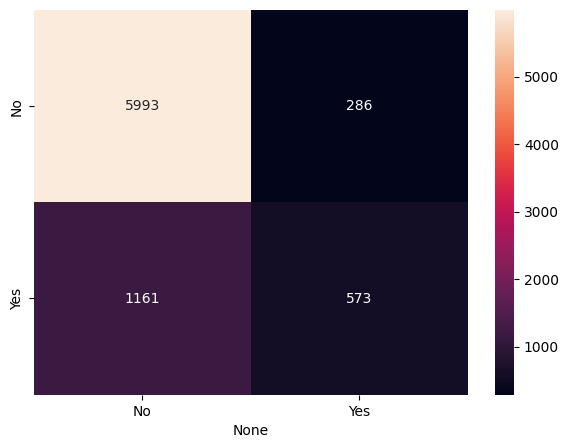

In [ ]:
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, y_predict, labels=[0,1])
df_cm = pd.DataFrame(cm, index = [i for i in ['No', 'Yes']], columns = [i for i in [['No', 'Yes']]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot = True, fmt = 'g')

In [ ]:
5993+286+573+1161

8013

In [ ]:
df.shape

(26707, 84)

In [ ]:
26707*0.3

8012.099999999999

In [ ]:
(5993+273)/8013

0.7819792836640459

CONFUSION MATRIX WITH ADABOOST CLASSIFIER

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators = 120, random_state=0)
abcl = abcl.fit(x_train,y_train)
y_predict = abcl.predict(x_test)
print(abcl.score(x_test,y_test))

0.832646948708349


<Axes: xlabel='None'>

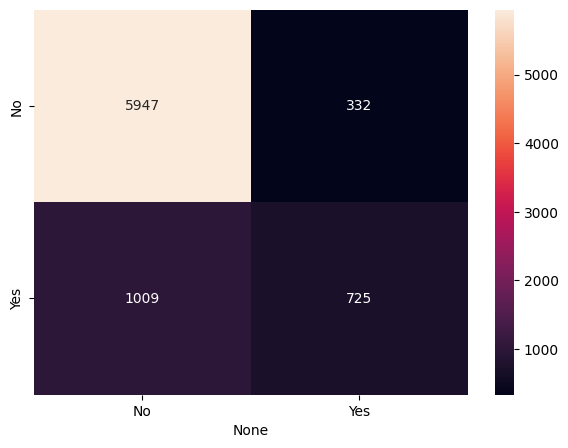

In [ ]:
cm = metrics.confusion_matrix(y_test, y_predict, labels=[0,1])

df_cm = pd.DataFrame(cm, index = [i for i in ['No', 'Yes']], columns = [i for i in [['No', 'Yes']]])

plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot = True, fmt = 'g')

BAGGING CLASSIFIER

In [ ]:
from sklearn.ensemble import BaggingClassifier
bgcl = BaggingClassifier(n_estimators = 100,
    max_samples=1.0,
    max_features=1.0,
    bootstrap=True,
    bootstrap_features=True,
    oob_score=False,
    warm_start=False,
    n_jobs=None,
    random_state=None,
    verbose=0,)
bgcl = bgcl.fit(x_train,y_train)
y_predict = bgcl.predict(x_test)
print(bgcl.score(x_train,y_train))
print(bgcl.score(x_test,y_test))


0.9999465069006098
0.8285286409584426


GRADIENT BOOSTING CLASSIFIER

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier()
gbcl = gbcl.fit(x_train,y_train)
y_predict = gbcl.predict(x_test)
print(gbcl.score(x_train,y_train))
print(gbcl.score(x_test,y_test))

0.8436396704825078
0.8367652564582553


RANDOM FOREST CLASSIFIER

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier( max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    n_estimators=10,
    criterion='gini',
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight=None,
    ccp_alpha=0.0,
    max_samples=None,)
rfcl = rfcl.fit(x_train,y_train)
y_predict = rfcl.predict(x_test)
print(rfcl.score(x_train,y_train))
print(rfcl.score(x_test,y_test))

0.9828822081951428
0.8186696617995757


SUPPORT VECTOR CLASSIFIERS(SVC)

In [ ]:
from sklearn.svm import SVC
svcl = SVC()
svcl = svcl.fit(x_train, y_train)
y_predict = svcl.predict(x_test)
print(svcl.score(x_train,y_train))
print(svcl.score(x_test,y_test))

0.8658927998288221
0.8377636340945963
